## Networkx and protein:protein interaction data

## Ribosomal protein interactions in Networkx

This notebook will be using data from a paper on protein networks in the eukaryotic ribosome. The original structure for this is pdb code 4v88 which has both the large (L) and small (S) subunits. The ribosome is basically an RNA machine for making proteins using the amino-acids provided by tRNAs. Protein decorate and stabilize the outside of the RNA - they also make contact with each other - very often through elongated projections that have been likened to the communicating extensions of neurones. 

The data in this notebook are from the analysis of these extensions in the 4v88 data by Poirot and Timsit (2016, Neuron-Like Networks Between Ribosomal Proteins Within the Ribosome. Sci Rep. 2016;6:26485. https://doi.org/10.1038/srep26485) 

Although it is interesting to look at the protein:protein interactions that they study in detail - it is important to remember that the ribosome is mainly RNA. You can see the structure if you load the 4v88 into ICM browser or at the PDBe webpage https://pdbe.org/4v88. 

If you do you will see how the proteins decorate the outer surface of the subunits. And that there is a cleft between the two subunits that allows the mRNA access to the active site. Because of this cleft, relatively few proteins from the small subunit can reach those in the large subunit. 

The tables of interactions have been turned into the python data structures below. 

Here is the network of contacts mentioned in the paper above (extracted from their tables S3 and S4). Many proteins have several contacts through elongated extensions.

In [1]:
# run this cell to load the table_of_contacts dictionary
table_of_contacts = {"eL13" : ["eL15", "eL18", "eL36", "uL15", "uL29", "uL4"],
"eL14" : ["eL20", "eL6", "uL13", "uL6"],
"eL15" : ["eL36", "eL42", "eL8", "uL2", "uL29", "uL4"],
"eL18" : ["uL15", "uL30", "uL4"],
"eL19" : ["eS7"],
"eL20" : ["eL21", "uL13", "uL16", "uL30", "uL4", "uL6"],
"eL21" : ["eL29", "uL16", "uL18", "uL30", "uL4"],
"eL24" : ["eS6", "uL14", "uL3"],
"eL27" : ["eL30", "eL34", "eL8"],
"eL30" : ["eL34", "eL43"],
"eL32" : ["eL33", "eL6", "uL15"],
"eL33" : ["eL6", "uL13", "uL22"],
"eL34" : ["eL39"],
"eL36" : ["eL8", "uL15"],
"eL37" : ["eL39", "uL29", "uL4"],
"eL39" : ["uL23", "uL24"],
"eL40" : ["uL6"],
"eL42" : ["uL15", "uL5"],
"eL43" : ["uL2"],
"eL8" : ["uL2", "uL23"],
"eS10" : ["eS12", "uS14", "uS3"],
"eS12" : ["eS31"],
"eS17" : ["uS2", "uS3"],
"eS19" : ["uS13", "uS9"],
"eS21" : ["eS24", "eS27", "eS4", "eS6", "uS2", "uS4", "uS5", "uS8"],
"eS24" : ["eS4", "eS6", "uS4"],
"eS25" : ["uS13", "uS7", "uS9"],
"eS27" : ["uS15", "uS8"],
"eS28" : ["eS30", "uS12", "uS4", "uS7"],
"eS30" : ["uS12", "uS4"],
"eS4" : ["eS6", "uS17", "uS4"],
"eS6" : ["uL3"],
"eS7" : ["uS15", "uS8"],
"eS8" : ["uS17"],
"uL13" : ["uL3", "uL6"],
"uL14" : ["uL3"],
"uL16" : ["uL18"],
"uL18" : ["uL5"],
"uL23" : ["uL29"],
"uL24" : ["uL4"],
"uL30" : ["uL4"],
"uS10" : ["uS14", "uS3", "uS9"],
"uS12" : ["uS17", "uS8"],
"uS13" : ["uS19"],
"uS14" : ["uS3"],
"uS15" : ["uS17", "uS8"],
"uS17" : ["uS8"],
"uS2" : ["uS5"],
"uS3" : ["uS5"],
"uS4" : ["uS5", "uS8"],
"uS5" : ["uS8"],
"uS7" : ["uS9"],
"GBP" : ["uS9", "uS12", "eS17"],
"STM1" : ["uS12", "uS19", "eS31" ],}

In [2]:
import networkx as nx

The protein interactions will be treated as reciprocal and so an undirected graph is used.

In [3]:
# run this cell to create (an empty) nx.Graph called contacts_graph
contacts_graph = nx.Graph()

The individual proteins can be added as nodes from the `table_of_contacts` dictionary keys

In [4]:
# run this cell add the individual proteins as nodes of protein_graph
contacts_graph.add_nodes_from(table_of_contacts.keys())

In [5]:

print(list(contacts_graph.nodes()))

['eL13', 'eL14', 'eL15', 'eL18', 'eL19', 'eL20', 'eL21', 'eL24', 'eL27', 'eL30', 'eL32', 'eL33', 'eL34', 'eL36', 'eL37', 'eL39', 'eL40', 'eL42', 'eL43', 'eL8', 'eS10', 'eS12', 'eS17', 'eS19', 'eS21', 'eS24', 'eS25', 'eS27', 'eS28', 'eS30', 'eS4', 'eS6', 'eS7', 'eS8', 'uL13', 'uL14', 'uL16', 'uL18', 'uL23', 'uL24', 'uL30', 'uS10', 'uS12', 'uS13', 'uS14', 'uS15', 'uS17', 'uS2', 'uS3', 'uS4', 'uS5', 'uS7', 'GBP', 'STM1']


Then the contacts from the network are added as edges.

In [6]:
# Then we determine the edges on the nodes
for protein, interacting_proteins in table_of_contacts.items():
    for contact in interacting_proteins:
        contacts_graph.add_edge(protein, contact)

In [7]:
import matplotlib.pyplot as plt

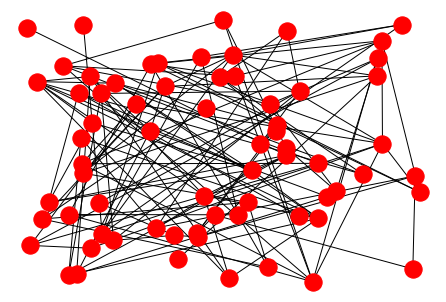

In [9]:
nx.draw_random(contacts_graph,node_color='r',)

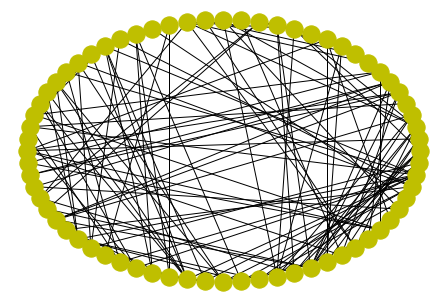

In [10]:
nx.draw_circular(contacts_graph,node_color='y',)

Neither one of those representations showed the effect of the cleft between the small and the large subunit. 

One approach is to apply a force to the nodes. The nodes are treated as if each edge was a little spring. This can untangle them.

This has to be done iteratively. And like the random approach it can vary from run to run.

But it should separate out the clusters of nodes for the two subunits.

If not then try altering the constant k or the number of interations.

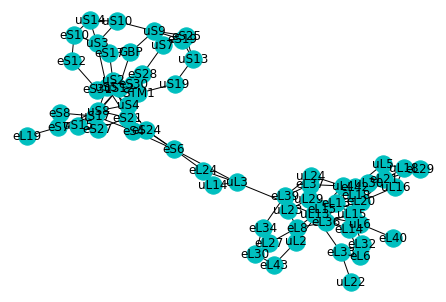

In [24]:
nx.draw_spring(contacts_graph, k=0.80, iterations=10, with_labels=True, node_color='c',)

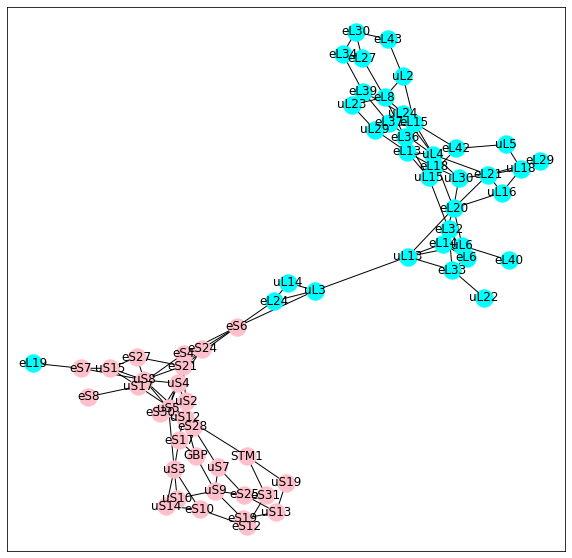

In [86]:
plt.figure(figsize=(10,10))
pos_spring = nx.spring_layout(contacts_graph)
#nx.draw(contacts_graph, pos=pos_spring)
large_labels = {label  for label in set(contacts_graph) if 'L' in label }
small_labels = set(contacts_graph) - large_labels
nx.draw_networkx_nodes(contacts_graph, pos=pos_spring, nodelist=large_labels, node_color='cyan')
nx.draw_networkx_nodes(contacts_graph, pos=pos_spring, nodelist=small_labels, node_color='pink')
nx.draw_networkx_labels(contacts_graph, pos=pos_spring)
nx.draw_networkx_edges(contacts_graph, pos=pos_spring)


In [85]:
n = contacts_graph.number_of_nodes()
print(n)

68


In [47]:
e = contacts_graph.number_of_edges()
print(e)

126


We can calculate the average

In [48]:
print(e/n)

1.8529411764705883


The network density compares this number of edges with the maximum possible.

In [49]:
nx.density(contacts_graph)

0.0553116769095698

In [56]:
# run this cell to print out the degree for each node in contact_graphs
print(contacts_graph.degree)

[('eL13', 6), ('eL14', 4), ('eL15', 7), ('eL18', 4), ('eL19', 1), ('eL20', 7), ('eL21', 6), ('eL24', 3), ('eL27', 3), ('eL30', 3), ('eL32', 3), ('eL33', 4), ('eL34', 3), ('eL36', 4), ('eL37', 3), ('eL39', 4), ('eL40', 1), ('eL42', 3), ('eL43', 2), ('eL8', 5), ('eS10', 3), ('eS12', 2), ('eS17', 3), ('eS19', 2), ('eS21', 8), ('eS24', 4), ('eS25', 3), ('eS27', 3), ('eS28', 4), ('eS30', 3), ('eS4', 5), ('eS6', 5), ('eS7', 3), ('eS8', 1), ('uL13', 5), ('uL14', 2), ('uL16', 3), ('uL18', 3), ('uL23', 3), ('uL24', 2), ('uL30', 4), ('uS10', 3), ('uS12', 6), ('uS13', 3), ('uS14', 3), ('uS15', 4), ('uS17', 5), ('uS2', 3), ('uS3', 5), ('uS4', 7), ('uS5', 5), ('uS7', 3), ('GBP', 3), ('STM1', 3), ('uL15', 5), ('uL29', 4), ('uL4', 8), ('eL6', 3), ('uL6', 4), ('uL2', 3), ('eL29', 1), ('uL3', 4), ('uL22', 1), ('uL5', 2), ('eS31', 2), ('uS9', 5), ('uS8', 8), ('uS19', 2)]


This can be sorted to find the best connected nodes. 

In [57]:
nodes_by_degree = sorted(contacts_graph.degree, key=lambda x: x[1], reverse=True)
print(nodes_by_degree)

[('eS21', 8), ('uL4', 8), ('uS8', 8), ('eL15', 7), ('eL20', 7), ('uS4', 7), ('eL13', 6), ('eL21', 6), ('uS12', 6), ('eL8', 5), ('eS4', 5), ('eS6', 5), ('uL13', 5), ('uS17', 5), ('uS3', 5), ('uS5', 5), ('uL15', 5), ('uS9', 5), ('eL14', 4), ('eL18', 4), ('eL33', 4), ('eL36', 4), ('eL39', 4), ('eS24', 4), ('eS28', 4), ('uL30', 4), ('uS15', 4), ('uL29', 4), ('uL6', 4), ('uL3', 4), ('eL24', 3), ('eL27', 3), ('eL30', 3), ('eL32', 3), ('eL34', 3), ('eL37', 3), ('eL42', 3), ('eS10', 3), ('eS17', 3), ('eS25', 3), ('eS27', 3), ('eS30', 3), ('eS7', 3), ('uL16', 3), ('uL18', 3), ('uL23', 3), ('uS10', 3), ('uS13', 3), ('uS14', 3), ('uS2', 3), ('uS7', 3), ('GBP', 3), ('STM1', 3), ('eL6', 3), ('uL2', 3), ('eL43', 2), ('eS12', 2), ('eS19', 2), ('uL14', 2), ('uL24', 2), ('uL5', 2), ('eS31', 2), ('uS19', 2), ('eL19', 1), ('eL40', 1), ('eS8', 1), ('eL29', 1), ('uL22', 1)]


The top of the list shows that there are well connected nodes in both the large and the small subunit. 

Networkx has a degree histogram function. 
The cell below shows that for a bin of 1 (it can be good to increase the bin size for larger graphs).

Text(0, 0.5, 'Frequency')

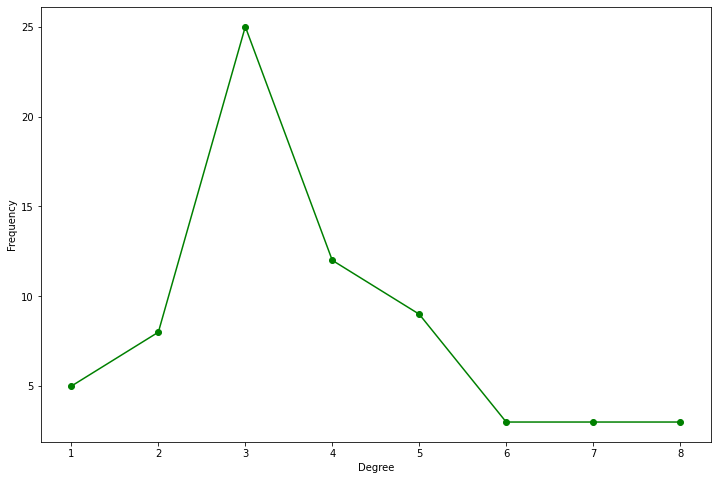

In [52]:
bin=1
degree_freq = nx.degree_histogram(contacts_graph)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(degrees[bin:], degree_freq[bin:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

The neighbours of particular nodes can be obtained. Here is one of the best connected nodes from the sorted degree dictionary earlier. 

In [54]:
list(contacts_graph.neighbors('eS21'))

['eS24', 'eS27', 'eS4', 'eS6', 'uS2', 'uS4', 'uS5', 'uS8']

Now write code to work through the 10 nodes of highest degree to see if any of these neighbours in the other subunit?

In [76]:
for node, degree in nodes_by_degree:
    other_subunit = 'S' if 'L' in node else 'L'
    #print(node, other_subunit, list(contacts_graph.neighbors(node)))
    other_contacts = [n for n in list(contacts_graph.neighbors(node)) if other_subunit in n]
    if other_contacts:
        print(node, degree, other_contacts)

eS6 5 ['eL24', 'uL3']
uL3 4 ['eS6']
eL24 3 ['eS6']
eS7 3 ['eL19']
eL19 1 ['eS7']


Cliques are also called 'complete' subgraphs. These are complete groups of nodes where each one is joined to each of the others.   

You can see that some of the best connected nodes are also members of multiple larger cliques. 

In [77]:
list(nx.find_cliques(contacts_graph))

[['uL6', 'eL14', 'uL13', 'eL20'],
 ['uL6', 'eL40'],
 ['uL4', 'eL13', 'eL18'],
 ['uL4', 'eL13', 'eL15'],
 ['uL4', 'uL24'],
 ['uL4', 'eL37'],
 ['uL4', 'uL30', 'eL18'],
 ['uL4', 'uL30', 'eL20', 'eL21'],
 ['uS15', 'uS8', 'uS17'],
 ['uS15', 'uS8', 'eS7'],
 ['uS15', 'uS8', 'eS27'],
 ['uS13', 'uS19'],
 ['uS13', 'eS19'],
 ['uS13', 'eS25'],
 ['uS19', 'STM1'],
 ['eS27', 'eS21', 'uS8'],
 ['eS17', 'uS2'],
 ['eS17', 'uS3'],
 ['eS17', 'GBP'],
 ['uS5', 'eS21', 'uS2'],
 ['uS5', 'eS21', 'uS8', 'uS4'],
 ['uS5', 'uS3'],
 ['eL19', 'eS7'],
 ['eS10', 'eS12'],
 ['eS10', 'uS3', 'uS14'],
 ['uL14', 'eL24', 'uL3'],
 ['uL5', 'eL42'],
 ['uL5', 'uL18'],
 ['eS30', 'eS28', 'uS12'],
 ['eS30', 'eS28', 'uS4'],
 ['uS9', 'eS19'],
 ['uS9', 'GBP'],
 ['uS9', 'uS10'],
 ['uS9', 'eS25', 'uS7'],
 ['uL16', 'eL21', 'eL20'],
 ['uL16', 'eL21', 'uL18'],
 ['eL8', 'eL27'],
 ['eL8', 'eL15', 'eL36'],
 ['eL8', 'eL15', 'uL2'],
 ['eL8', 'uL23'],
 ['eL43', 'eL30'],
 ['eL43', 'uL2'],
 ['STM1', 'eS31'],
 ['STM1', 'uS12'],
 ['uS8', 'uS17', 'uS1

It is interesting to compare a network with an artificial one made in some random way. The original of this is the Erdox-Renyi graph. This is made for the given number of nodes and the probability of edge formation. Conveniently this is the graph density. 
Our network had 68 nodes and an approximate density of 0.055.

Of course this will give a different graph every time it is run.

In [78]:
E = nx.erdos_renyi_graph(68,0.055)

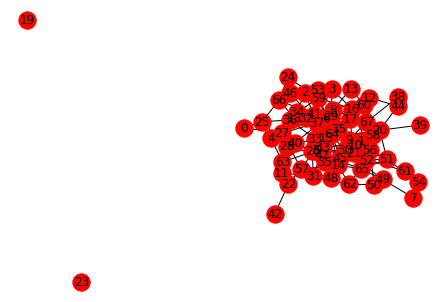

In [79]:
nx.draw_spring(E,k=0.80,iterations=50, with_labels=True, node_color='r',)

You may see that a low density has a fairly high chance of having disconnected components.
The ribosome did in fact have several disconnect components that were present in the paper's data table but which was editted out for simplicity in the plots for this notebook. 

We can plot the degree histogram of the random graph for comparison with the ribosome protein one. 

Text(0, 0.5, 'Frequency')

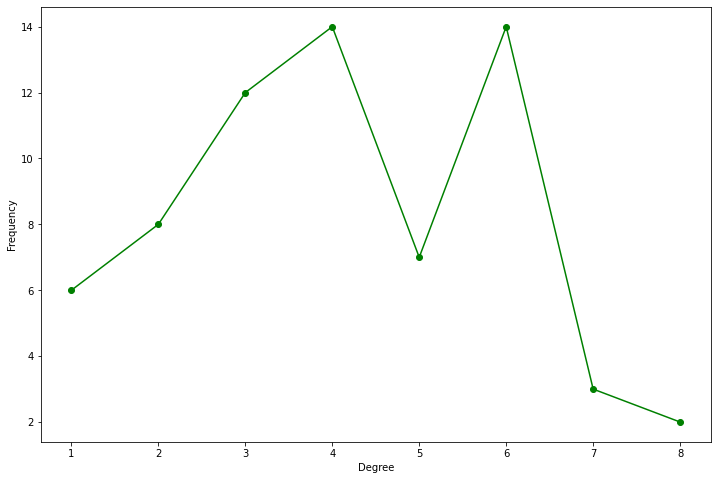

In [80]:
bin=1
degree_freq = nx.degree_histogram(E)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(degrees[bin:], degree_freq[bin:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

The Watts-Strogatz graph is a special kind of random artificial graph. This is made for the given number of nodes and a starting number of edges (k). But then the connections are re-wired to attempt to add a 'small world' connectivity to the network. The parameter p controls the rewiring. 

So here is a small world network the same size as our ribosomal one. This version enforces a connected graph. 

In [81]:
S = nx.connected_watts_strogatz_graph(68, k=4, p=0.5)

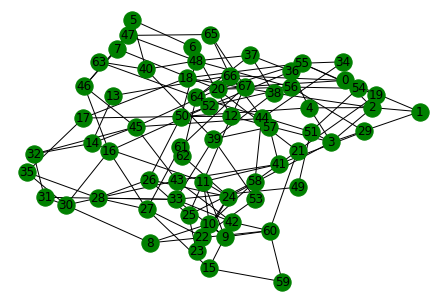

In [82]:
nx.draw_spring(S,k=0.80,iterations=50, with_labels=True, node_color='g',)

Text(0, 0.5, 'Frequency')

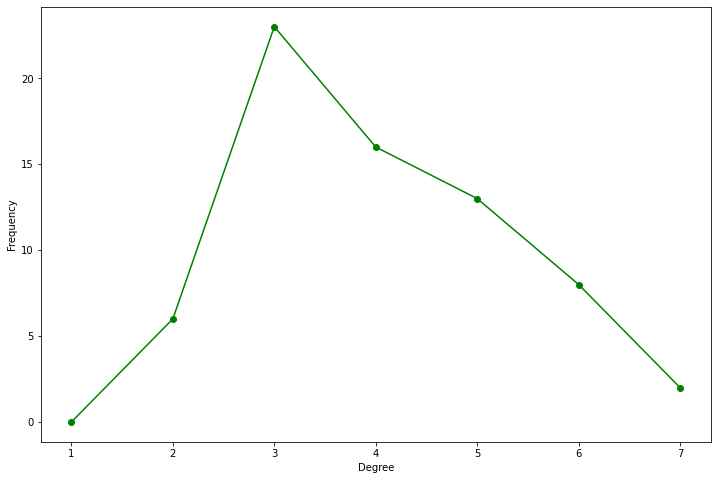

In [83]:
bin=1
degree_freq = nx.degree_histogram(S)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(degrees[bin:], degree_freq[bin:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')